,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
data.shape

(193573, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


In [5]:
data.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,193573.000000,193573,193573,193573,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,92454,44391,53272,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.790688,NaN,NaN,NaN,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,NaN,NaN,NaN,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,NaN,NaN,NaN,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,NaN,NaN,NaN,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,NaN,NaN,NaN,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000


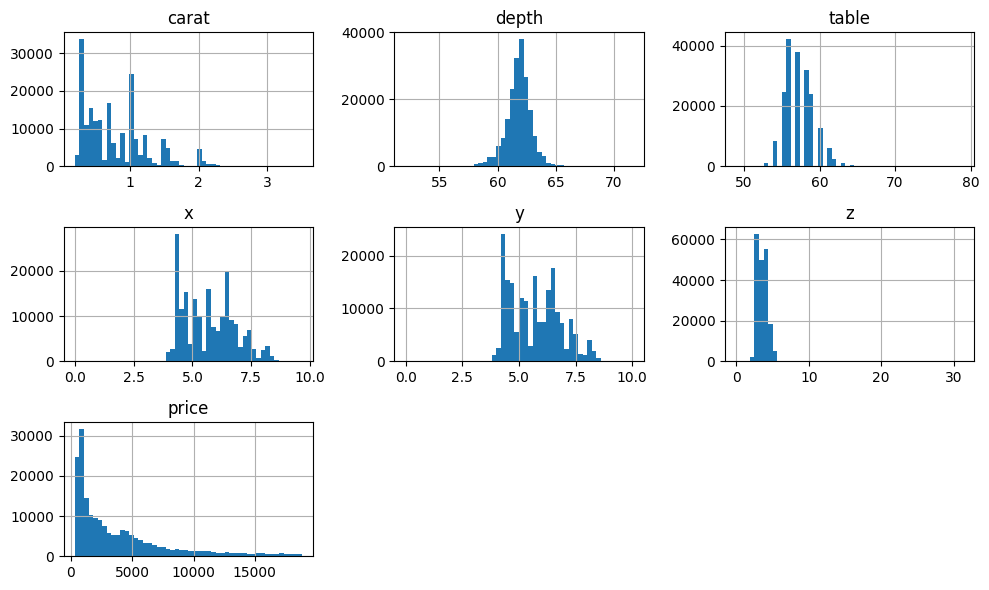

In [7]:

data.hist(bins=50,figsize=(10,6));
plt.tight_layout()

In [ ]:
# plot countplot of all categorical features

In [8]:
data.corr(numeric_only=True)

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

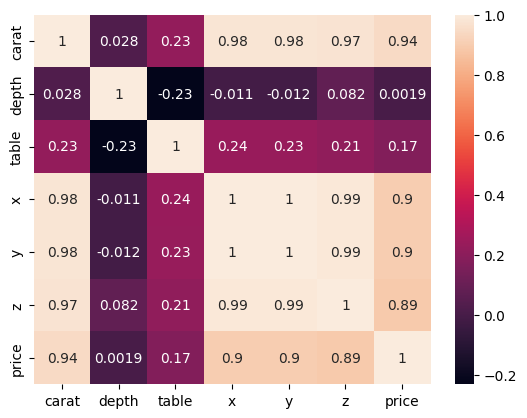

In [9]:
sns.heatmap(data.corr(numeric_only=True),annot=True)



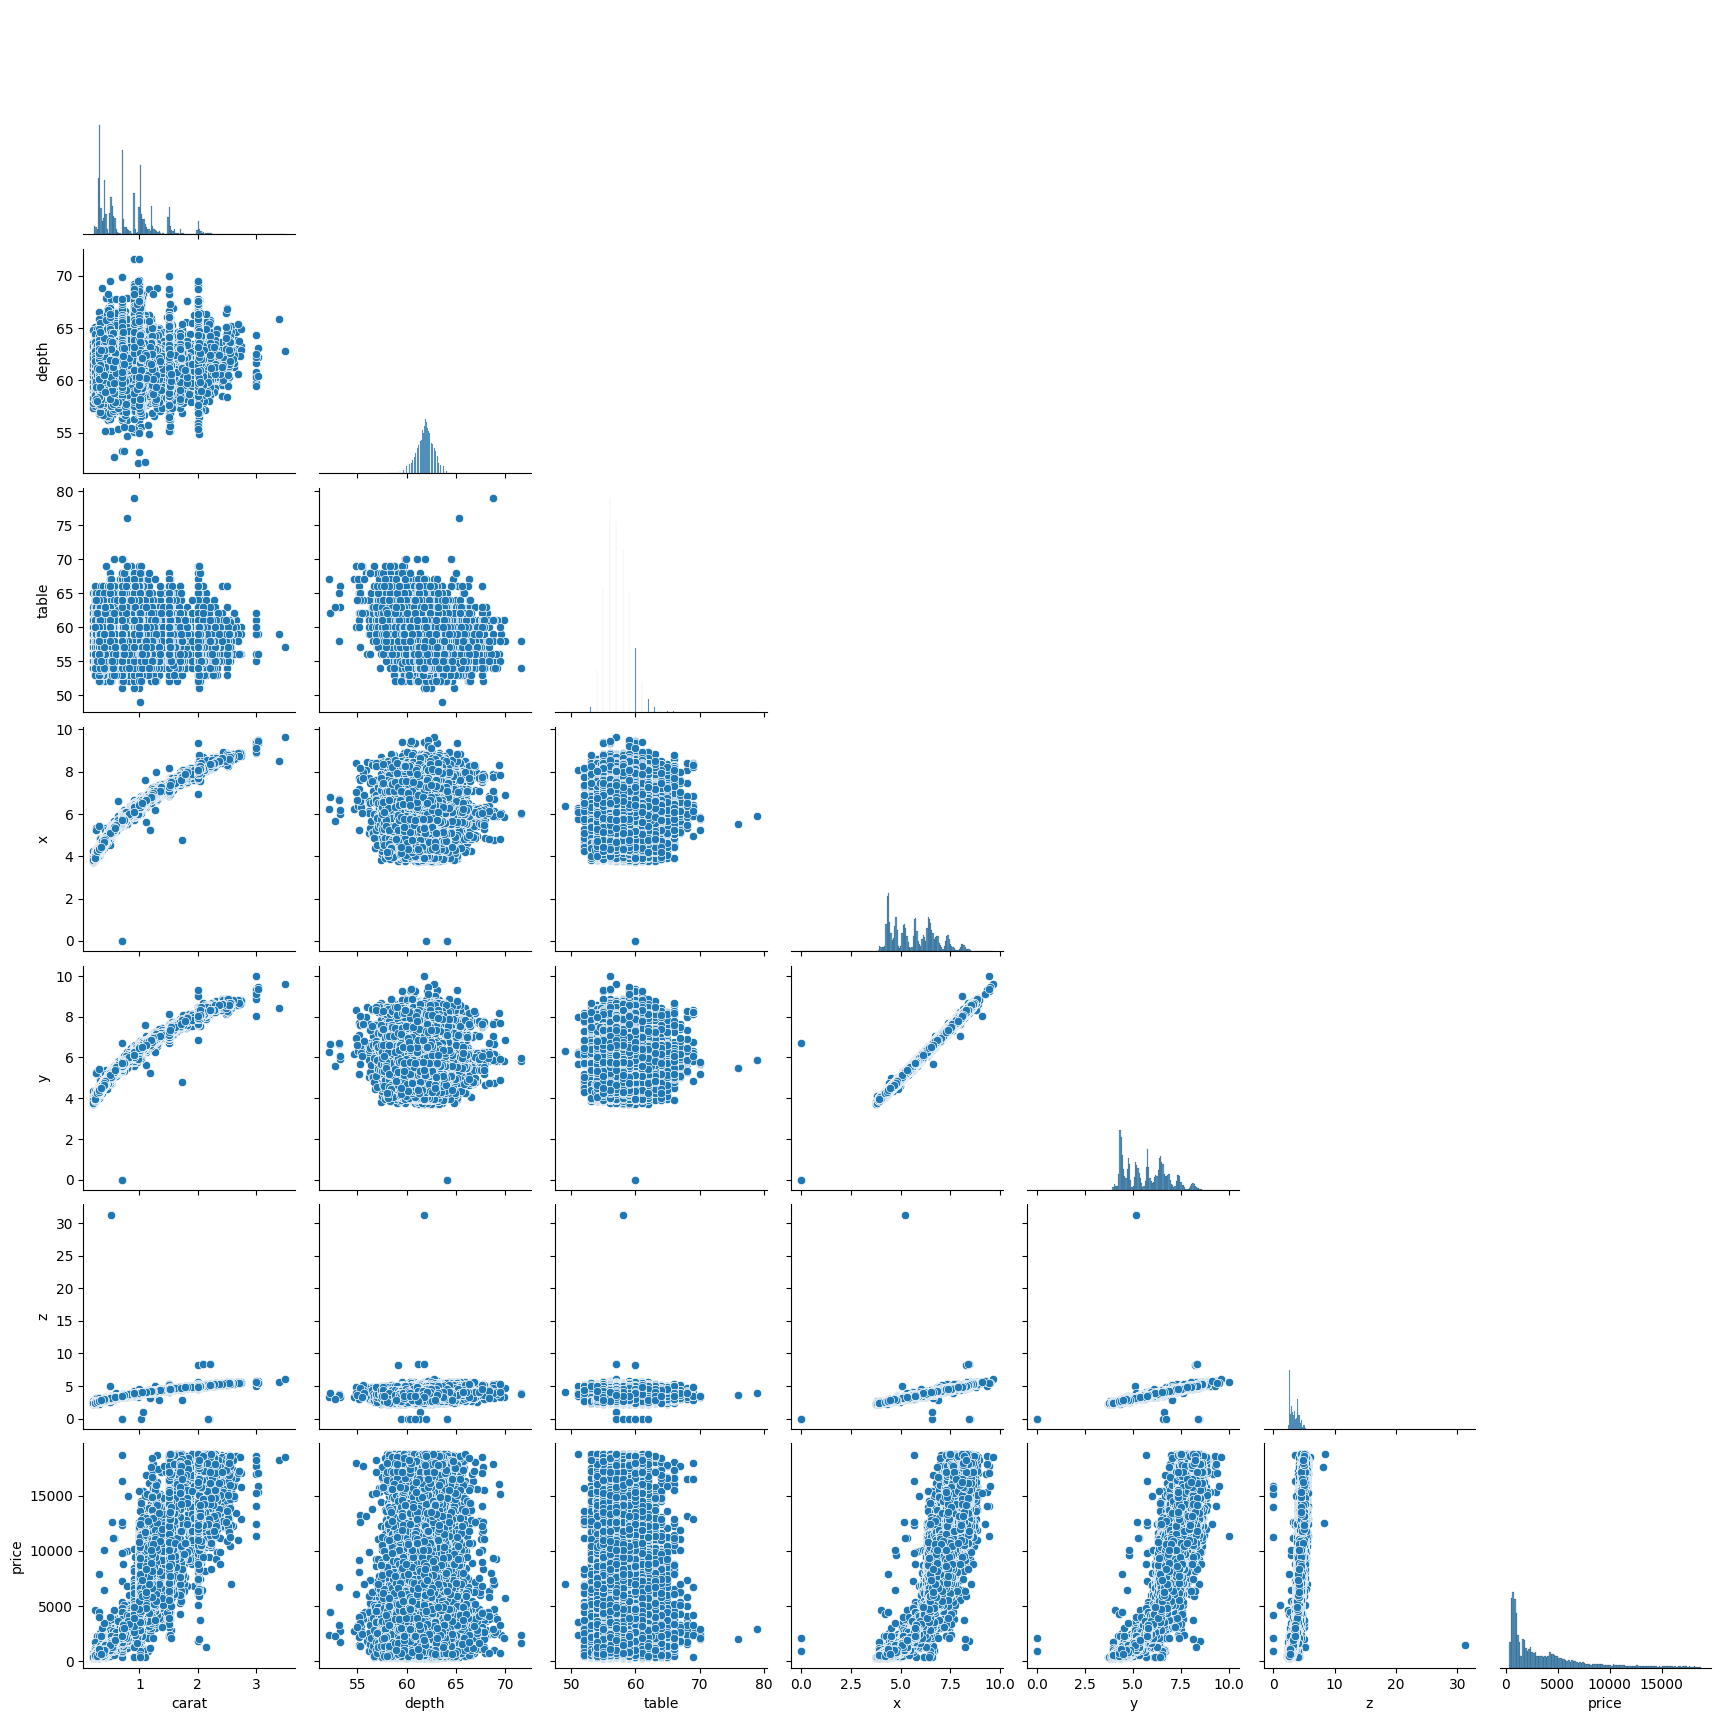

In [ ]:
sns.pairplot(data,corner=True)

In [10]:
data.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

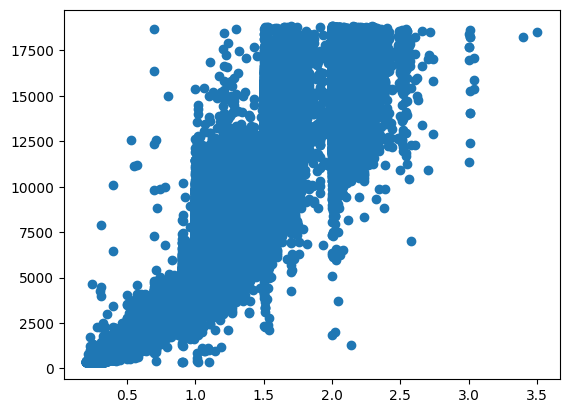

In [11]:
plt.scatter(data.carat,data.price)

In [12]:
data.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [13]:
data.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [14]:
data.duplicated().sum()

0

In [15]:
data_num = data.select_dtypes(include='float')
data_num.dtypes

carat    float64
depth    float64
table    float64
x        float64
y        float64
z        float64
dtype: object

In [16]:
data_cat = data.select_dtypes('object')
data_cat.dtypes

cut        object
color      object
clarity    object
dtype: object

In [17]:
data_cat['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [18]:
data_cat.color.value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [19]:
data_cat.clarity.value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

<Axes: xlabel='carat', ylabel='Count'>

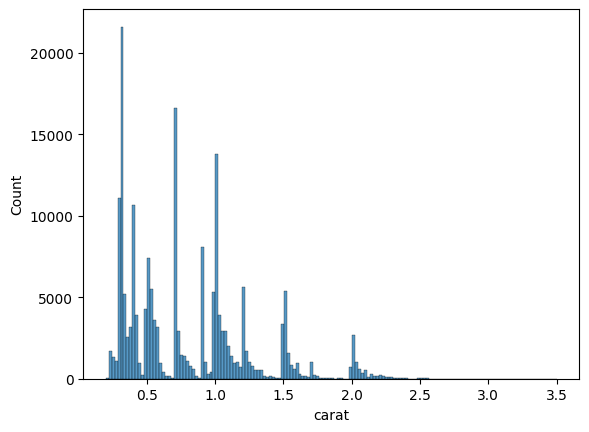

In [20]:
sns.histplot(data,x='carat')

<Axes: xlabel='price', ylabel='Count'>

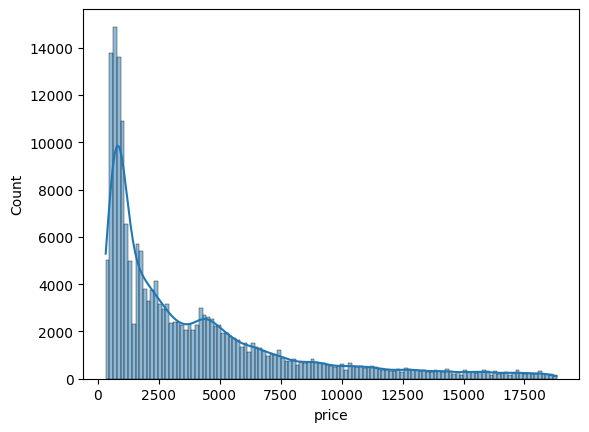

In [21]:
sns.histplot(data,x='price',kde=True)

# Feature Engineering

In [22]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [25]:
data = data.assign(
    cut = data['cut'].map(cut_map),
    clarity = data['clarity'].map(clarity_map),
    color = data['color'].map(color_map)
)